In [1]:
#import initial dependencies, more to follow
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## PART I: DATA CLEANING AND PRE-PROCESSING

In [2]:
# Data loading
file_path = Path("myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
df_myopia.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [4]:
for column in df_myopia.columns:
    print(f"Column {column} has {df_myopia[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values


In [5]:
print(f"Duplicate entries: {df_myopia.duplicated().sum()}")

Duplicate entries: 0


In [6]:
df_myopia_2 = df_myopia.drop(['MYOPIC'], axis=1)

df_myopia_2.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [8]:
# Scale the data
from sklearn.preprocessing import StandardScaler
target = df_myopia["MYOPIC"]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia_2)

In [9]:
df_myopia_2.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [14]:
# Create a new df with the transformed data
new_df_myopia = pd.DataFrame(scaled_data, columns=df_myopia_2.columns[0:])
new_df_myopia['DADMY'] = df_myopia_2['DADMY']
new_df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,0


In [15]:
# Saving cleaned data
file_path = Path("myopia_cleaned_3.csv")
new_df_myopia.to_csv(file_path, index=False)

## PART II: PCA- DIMENSIONALITY REDUCTION

In [16]:
# Load the data
file_path_2 = Path("myopia_cleaned_3.csv")
new_df_myopia = pd.read_csv(file_path_2)
new_df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,0


In [17]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(scaled_data)

In [30]:
df_myopia_pca = pd.DataFrame(data=myopia_pca)
df_myopia_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [20]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

Initially, I ran the model with PC-1 and PC-2 components but it only accounted for 42% of the variance. I scrapped that, in favor of instantiating the amount of variance I wanted to preserve @ 90% so I wouldn't have to increase the components stepwise to reduce variance. This model explains only 21% + 16% of the variance, for a total of 37% of the total dataset, but since it was the suggested method for this step, it's the one I will continue with.

In [21]:
from sklearn.manifold import TSNE

In [31]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=200)

In [32]:
tsne_features = tsne.fit_transform(df_myopia_pca)

C:\Users\msfte\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [33]:
tsne_features.shape

(618, 2)

In [38]:
# Prepare to plot the dataset

# The first column of transformed features
df_myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_pca['y'] = tsne_features[:,1]

df_myopia_pca['class'] = df_myopia["MYOPIC"]

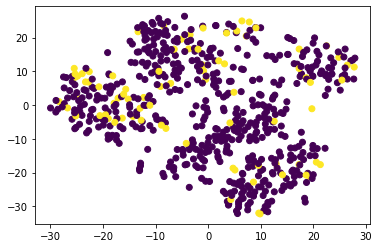

In [39]:
# Visualize the clusters
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c=df_myopia_pca['class'])
plt.show()

It doesn't appear that there are any distinct clusters in this data. Argh.

## PART III: K-Means Model

In [43]:
#For loop for the model 
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\msfte\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\msfte\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "
C:\Users\msfte\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\msfte\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names 

,k,inertia
0,1,264625.338398
1,2,148567.403234
2,3,87426.185073
3,4,61076.150865
4,5,47385.838133


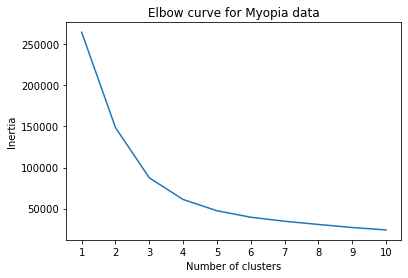

In [44]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia data')
plt.show()

The inflection point of the elbow curve looks like it's at 5, so that would represent the optimal number of clusters.

In [45]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [46]:
clusters = get_clusters(5, df_myopia_pca)
clusters

C:\Users\msfte\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\msfte\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,0,1,2,3,4,5,6,7,8,9,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-9.073933,5.500865,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-20.115667,-4.190438,3
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,5.670485,-3.325849,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,4.730649,-18.710135,4
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1.316884,13.102141,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996,-0.963317,22.799534,0
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105,-19.649847,-4.547525,3
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777,-19.939255,-5.949948,3
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581,1.691115,-13.843513,1


*So in the above dataframe, I do recognize that the output was not as expected (i.e., has too many features). This represented a dataframe that I shoehorned the 'x' (actually PC-1) and 'y' (PC-2) components onto since other (numerous) attempts to create a dataframe with the principal components were unsuccessful. This does manage to work but I understand it's a little convoluted and not as clean a code as it should have been. 

In [47]:
def show_clusters(df):
    plt.scatter(x=df_myopia_pca['x'], y=df_myopia_pca['y'], c=df_myopia_pca['class'])
    plt.xlabel('X or PC1')
    plt.ylabel('Y or PC2')
    plt.show()

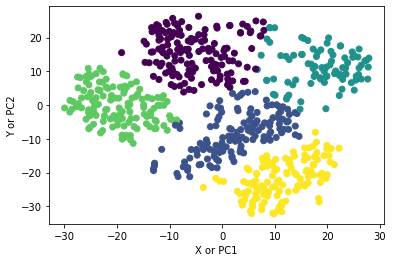

In [48]:
show_clusters(clusters)

5 clusters! PCA wasn't appropriate to visualize the distinct clusters of patients that could be drawn from this dataset to analyze separately, but K-Means did the trick. We didn't know how many potential groups of patients could be teased apart from this data but it's clear from the scatterplot that distinct groups could be used to predict myopia.